### Imbalance Data
- Biasa terjadi di kasus Klasifikasi untuk Deteksi (Detektor)
- Kita ingin mendapatkan/mencari kelas tertentu
- Kelas ==> Label Target
- Misal ingin mencari Kredit yg macet, atau reservasi hotel yg cancel, atau mencari customer yg churn(pindah)
- Adanya Ketimpangan, perbedaan proporsi yg signifikan antar kelas. Jadi misal targetnya : Kredit Lancar dan Macet, Lancar ==> 95%, Macet ==> 5%
- **Goals dari Project mendapatkan-menemukan kelas yg minoritas**
- Model cenderung bias, akan jago buat prediksi kelas yg mayoritas dan akan jelek ketika prediksi data minoritas
- Prediksi data Minoritas ==> Menjadi Tujuan Utama dari Project
- **Accuracy is out of Business** ==> Matrix akurasi tidak bisa digunakan, karna akan bias
- Akurasi bisa digunakan jika setiap feature sangat berbeda
- Evaluation Metrics yg dapat kita gunakan : **Recall, Precision,** ROC_AUC, F1_score
- Untuk mengecek proporsi data secara cepat, dapat menggunakan fungsi Value_counts atau crosstab
Contoh Kasus :
Dataset Kredit ==> 1000
Lancar == 990
Macet ==10

Splitt
Lancar = 792
Macet = 8

### Cara Handling - Imbalance
- Ketika Menggunakan Train-Test-Split, Pastikan sudah menggunakan **Stratify**
- Pilih jenis Algoritma (Lakukan beberapa percobaan)
- Ada Beberapa Algoritma yg memiliki parameter **Class Weight** pengaturan Class Weight Bisa di Tuning
- Kelas Minority (Macet = 5%) diberi Bobot lebih tinggi dibanding kelas Majority (Lancar = 95%)
- Menggunakan Metode RandomSampling ==> 
    - Random Over Sampling ==> Data Target Minority akan `diduplikasi secara random`, hingga jumlahnya sama dengan majority ==> Membuat data macet menjadi 792
    - Random Under Sampling ==> Data Target Majority akan `dihilangkan secara random`, hingga jumlahnya sama dengan minority ==> Membuat Data Lancar menjadi 8
- Menggunakan Metode SMOTE => Synthetic Minority OverSampling Technique ==> Data target Minority akan dibuatkan Data Sintetis (Data Buatan) hingga jumlahnya sama dengan Majority

- Metode RandomSampling dan SMOTE hanya digunakan pada data Train

In [ ]:
95 - 5
95 + 0 / 100

95%
lancar ==> semua pinjaman dibawah 500 juta & jakarta
macet ==> semua pinjaman diatas 500 juta & bandung

Tujuan Machine Learning ==> Prediksi Data Baru ==> Data yg sama sekali belum pernah dilihat oleh Model

Data Baru ==> disimulasikan oleh Test Data

Secara General ==> Tujuan Machine Learning ==> Mendapatkan Evaluation Matrix untuk Test Data dg nilai Sebaik Mungkin

In [1]:
### Import Common Package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df['Class'].value_counts()/len(df)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
### Splitting Data

In [12]:
X = df.drop(columns='Class') ## Menentukan Kolom Feature , Semua kolom yg dipilih Selain Kolom Target
y = df.Class

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, stratify = y, random_state = 42)

In [15]:
X_train.shape

(227845, 30)

In [16]:
X_test.shape

(56962, 30)

In [17]:
### Machine Learning Modelling

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
modelLog = LogisticRegression()

In [20]:
modelLog.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_predLog = modelLog.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report

### Model Berfokus Pada nilai Recall dari 1
-Yang akan dihindari adalah Error, False Negative ==> Aktualnya Fraud tetapi model memprediksi Non-Fraud

In [23]:
print(classification_report(y_test, y_predLog))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.72      0.72        98

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
cm = confusion_matrix(y_test, y_predLog, labels=[1 , 0])

In [27]:
pd.DataFrame(data=cm, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,71,27
Akt 0,28,56836


In [28]:
df_cm = pd.DataFrame(data=cm, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

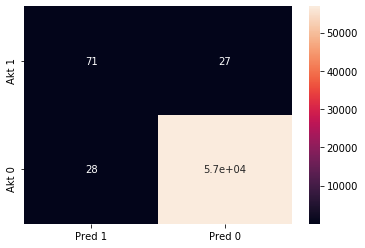

In [29]:
sns.heatmap(df_cm, annot=True)

## RandomSampling
- Hanya digunakan untuk Dataset Training

In [32]:
df_train = pd.concat([X_train, y_train], axis=1)

In [33]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [34]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [35]:
non_fraud = df_train[df_train['Class'] == 0] ### 227451
fraud = df_train[df_train['Class'] == 1] ### 394

### Random OverSampling
- Menduplikasi secara random, data yang memiliki label-target = 1 hingga jumlahnya sama dengan data dengan label-target = 0
- Dataframe **fraud** akan di Oversampling

In [36]:
from sklearn.utils import resample

In [37]:
fraud_oversample = resample( fraud, ## Kelas Minority
                            replace = True,
                            n_samples = len(non_fraud),## Kelas Majority
                            random_state = 42)

In [38]:
df_OverSampled = pd.concat([non_fraud, fraud_oversample])

In [39]:
df_OverSampled['Class'].value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [40]:
X_train_Oversample = df_OverSampled.drop(columns='Class')
y_train_Oversample = df_OverSampled['Class']

In [41]:
modelOverSample = LogisticRegression()

In [42]:
modelOverSample.fit(X_train_Oversample, y_train_Oversample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred_OS = modelOverSample.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_OS))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.91      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [47]:
cm_OS = confusion_matrix(y_test, y_pred_OS, labels=[1 , 0])

In [48]:
df_OS = pd.DataFrame(data=cm_OS, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

In [49]:
pd.DataFrame(data=cm_OS, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,89,9
Akt 0,2758,54106


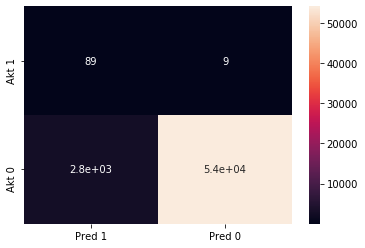

In [50]:
sns.heatmap(df_OS, annot=True)
plt.show()

0    227451
1       394
Name: Class, dtype: int64

### Random Under Sampling
- Menghapus secara random, data yang memiliki label-target = 0 hingga jumlahnya sama dengan data dengan label-target = 1
- Dataframe **non_fraud** akan di Undersampling

In [53]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [54]:
non_fraud = df_train[df_train['Class'] == 0] ### 227451
fraud = df_train[df_train['Class'] == 1] ### 394

In [55]:
non_fraud_undersample = resample(non_fraud, ## Data Majority
                                replace=False,
                                n_samples = len(fraud), ## Jumlah kelas Minority
                                random_state = 42)

In [56]:
df_UnderSample = pd.concat([non_fraud_undersample, fraud])

In [57]:
df_UnderSample['Class'].value_counts()

1    394
0    394
Name: Class, dtype: int64

In [58]:
X_train_US = df_UnderSample.drop(columns='Class')
y_train_US = df_UnderSample['Class']

In [59]:
modelUnderSample = LogisticRegression()

In [60]:
modelUnderSample.fit(X_train_US, y_train_US)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred_US = modelUnderSample.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred_US))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [63]:
cm_US = confusion_matrix(y_test, y_pred_US, labels=[1 , 0])

In [64]:
df_US = pd.DataFrame(data=cm_US, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

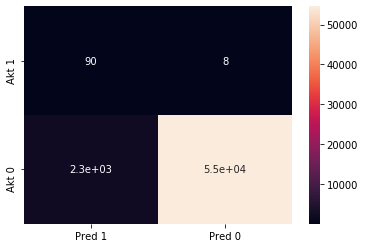

In [65]:
sns.heatmap(df_US, annot=True)
plt.show()

In [66]:
pd.DataFrame(data=cm_US, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,90,8
Akt 0,2313,54551


### SMOTE
- Membuat data sintetis(data buatan), data yang memiliki label-target = 1 hingga jumlahnya sama dengan data dengan label-target = 0

In [67]:
import imblearn

conda install -c conda-forge imbalanced-learn=0.6

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTE(random_state = 42)

In [70]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


In [71]:
y_train.head()

265518    0
180305    0
42664     0
198723    0
82325     0
Name: Class, dtype: int64

In [72]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [74]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [75]:
df_SMOTE = pd.concat([X_train_sm, y_train_sm], axis=1)

In [76]:
df_SMOTE['Class'].value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [77]:
modelSMOTE = LogisticRegression()

In [78]:
modelSMOTE.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
y_pred_sm = modelSMOTE.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [81]:
cm_sm = confusion_matrix(y_test, y_pred_sm, labels=[1 , 0])

In [82]:
df_SM = pd.DataFrame(data=cm_sm, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

In [83]:
pd.DataFrame(data=cm_sm, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,89,9
Akt 0,1273,55591


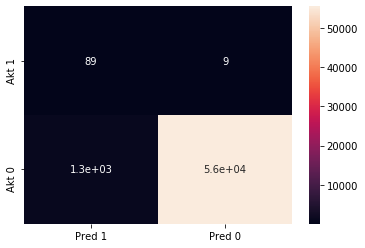

In [85]:
sns.heatmap(df_SM, annot=True)
plt.show()

### Setup - Tuning Clas weight
- Melakukan Pembobotan Class pada Algoritma tertentu

In [87]:
from sklearn.svm import SVC

In [88]:
model_SVM = SVC(class_weight={0: .05, 1: .95})

In [89]:
model_SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.05, 1: 0.95},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [90]:
y_pred_SVM = model_SVM.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [92]:
cm_svm = confusion_matrix(y_test, y_pred_SVM, labels=[1 , 0])

In [93]:
df_SVM = pd.DataFrame(data=cm_svm, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

In [94]:
pd.DataFrame(data=cm_svm, index = ['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,0,98
Akt 0,0,56864


In [97]:
(y_test == 1).sum()

98

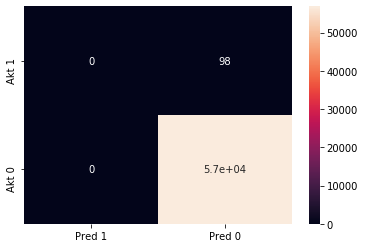

In [98]:
sns.heatmap(df_SVM, annot=True)
plt.show()

In [99]:
### Algoritma SVM menggunakan data SMOTE

In [ ]:
model_SVM.fit(X_train_sm, y_train_sm)